#### ***Lecture 07***  | Noise Reduction

In [60]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

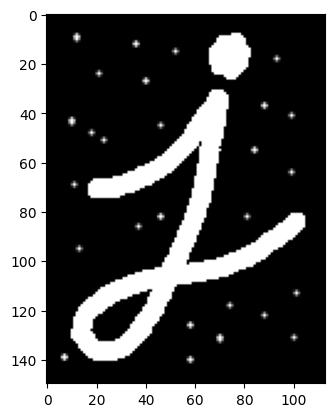

In [61]:
# Load Image
img = cv2.imread('opening.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(img, cmap='gray')

def imgDisplay(localImg):
    plt.figure(figsize= (11, 11))
    
    plt.subplot(1, 2, 1)
    plt.imshow(img, cmap= 'gray')
    
    plt.subplot(1, 2, 2)
    plt.imshow(localImg, cmap= 'gray')
    
    plt.show()

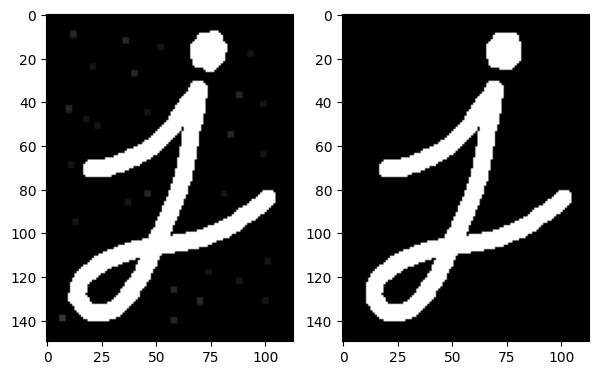

In [62]:
### --- Opening (Reduce noise) ---

# Define kernel
ker1 = np.ones((3,3), np.uint8)
ker2 = np.ones((5,5), np.uint8)

# Apply function
# | image matrix
# | morph type: MORPH_OPEN
# | kernel size
res1 = cv2.morphologyEx(img, cv2.MORPH_OPEN, ker1, iterations= 1)
res2 = cv2.morphologyEx(img, cv2.MORPH_OPEN, ker2, iterations= 1)

# Display image
plt.figure(figsize= (7, 7))
plt.subplot(1, 2, 1)
plt.imshow(res1, cmap= 'gray')
plt.subplot(1, 2, 2)
plt.imshow(res2, cmap= 'gray')

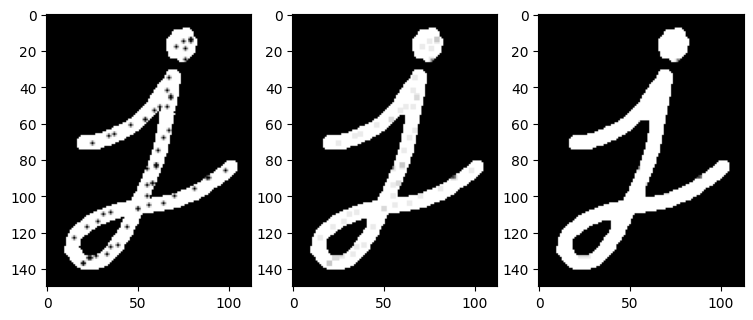

In [63]:
### --- Closing (Fill hole) ---

# Load new image
img = cv2.imread('closing.png')

# Apply function
# same function but difference "morpht type": MORPH_CLOSE
res1 = cv2.morphologyEx(img, cv2.MORPH_CLOSE, np.ones((3,3)), iterations= 1)
res2 = cv2.morphologyEx(img, cv2.MORPH_CLOSE, np.ones((5,5)), iterations= 1)

# Display image
plt.figure(figsize= (9, 9))
plt.subplot(1, 3, 1)
plt.imshow(img, cmap= 'gray')
plt.subplot(1, 3, 2)
plt.imshow(res1, cmap= 'gray')
plt.subplot(1, 3, 3)
plt.imshow(res2, cmap= 'gray')

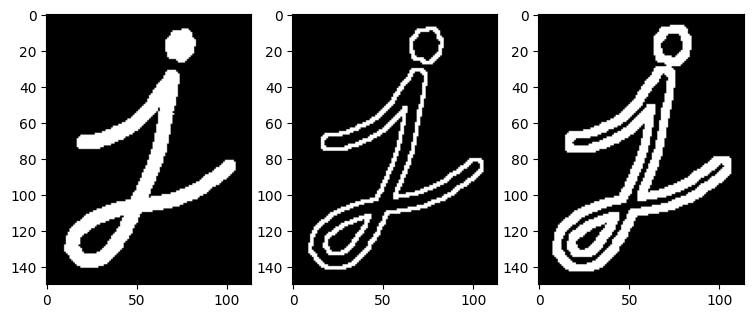

In [64]:
### --- Gradient ---

# Load new image
img = cv2.imread('gradient.png')

# Apply function
# > kernel 3x3 generate a border size of 2 pixels
# > is the different of dilate and erode
res1 = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, np.ones((3,3)), iterations= 1)
res2 = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, np.ones((5,5)), iterations= 1)

# Display image
plt.figure(figsize= (9, 9))
plt.subplot(1, 3, 1)
plt.imshow(img, cmap= 'gray')
plt.subplot(1, 3, 2)
plt.imshow(res1, cmap= 'gray')
plt.subplot(1, 3, 3)
plt.imshow(res2, cmap= 'gray')


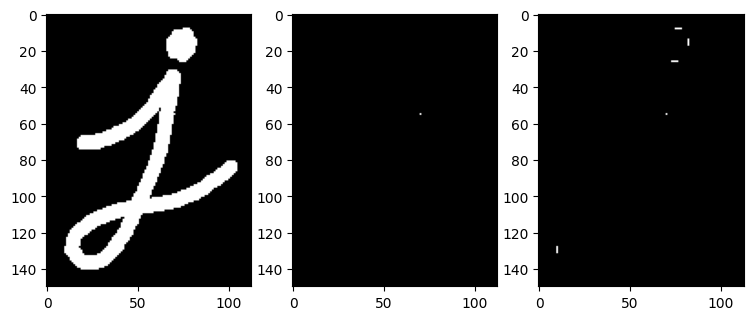

In [65]:
### --- Top hat ---

# Load new image
img = cv2.imread('tophat.png')

# Apply function
# > gets the noise from the image
res1 = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, np.ones((3,3)), iterations= 1)
res2 = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, np.ones((5,5)), iterations= 1)

# Display image
plt.figure(figsize= (9, 9))
plt.subplot(1, 3, 1)
plt.imshow(img, cmap= 'gray')
plt.subplot(1, 3, 2)
plt.imshow(res1, cmap= 'gray')
plt.subplot(1, 3, 3)
plt.imshow(res2, cmap= 'gray')


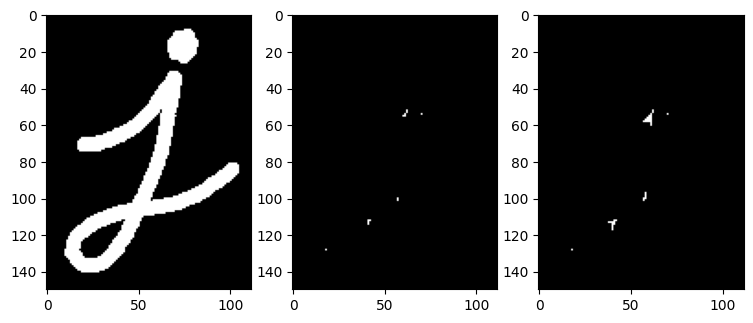

In [66]:
### --- Black hat ---

# Load new image
img = cv2.imread('blackhat.png')

# Apply function
# > gets the different between input and opening image
res1 = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, np.ones((3,3)), iterations= 1)
res2 = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, np.ones((5,5)), iterations= 1)

# Display image
plt.figure(figsize= (9, 9))
plt.subplot(1, 3, 1)
plt.imshow(img, cmap= 'gray')
plt.subplot(1, 3, 2)
plt.imshow(res1, cmap= 'gray')
plt.subplot(1, 3, 3)
plt.imshow(res2, cmap= 'gray')


#### ***Lecture 07***  | Hough Transform

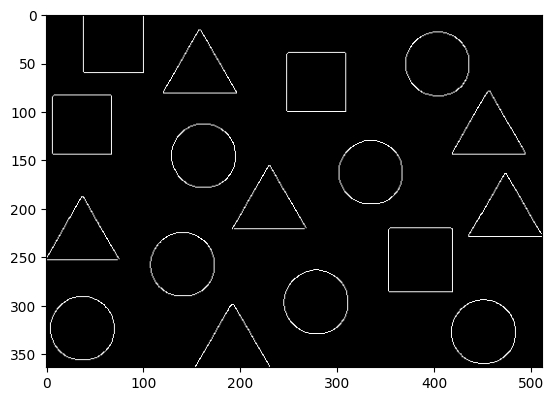

In [67]:
### --- Hough line ---

# Load image 
img = cv2.imread('colorobject.png')

# Prepare image
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, img_thresh = cv2.threshold(img_gray, 10, 255, cv2.THRESH_BINARY)
edge = cv2.Canny(img_thresh, 50, 200)
plt.imshow(edge, cmap='gray')

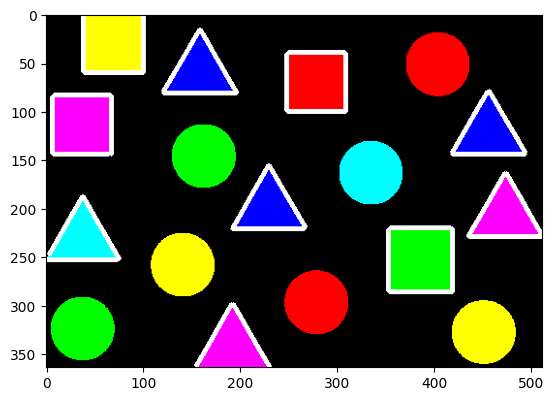

In [68]:
# Apply Hough line
# HoughLineP(img, rho, theta, threshold)
# | rho: resolution of distance from (0,0) for fitting line
# | theta: resolution of angle for fitting line
# | threshold: amount of point to make a line
lines = cv2.HoughLinesP(edge, 1, np.pi/360, 50, minLineLength=20, maxLineGap=10)

if lines is None:
    print('no Line detected')

# Draw the detected line
img_line = img.copy()
for i in range(len(lines)):
    for x1, y1, x2, y2 in lines[i]:
        cv2.line(img_line, (x1, y1), (x2, y2), (255, 255, 255), thickness= 3)

# Display 
plt.imshow(img_line)

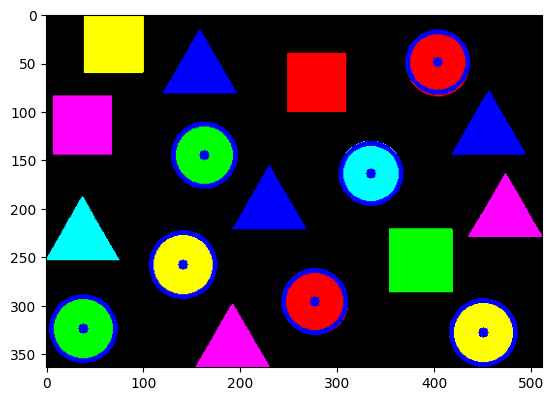

In [70]:
### --- Hough circle ---

# apply hough
# | param1: upper threshold for canny edge detection
# | param2: amount of point having same r to crate a circle - more -> less circle
circles = cv2.HoughCircles(img_gray, cv2.HOUGH_GRADIENT,
                           dp= 1.0, minDist= 20,
                           param1= 10, param2= 10,
                           minRadius= 30, maxRadius= 40)

img_circle = img.copy()
for x, y, r in circles[0]:
    cv2.circle(img_circle, (int(x), int(y)), int(r), (0, 0, 255), thickness= 4)
    cv2.circle(img_circle, (int(x), int(y)), 5, (0, 0, 255), thickness= -1)
    
plt.imshow(img_circle)